# Data Visualization

## Where the data at?

In [1]:
aml02_path = '../Data/AML02_clinicaldata_ciberscore_FMcleaned.csv'
cog_path = '../Data/COG_clinicaldata_ciberscore_FMcleaned.csv'

## Which score is this?

In [2]:
score_name = 'AML02_CS_5'

## Import Libraries

In [3]:
import pandas as pd
import seaborn as sns

# Set theme
sns.set_theme(style='white')

# Import Plotting Functions
from FM_Functions.Data_Visualization import *

## Load Datasets

In [4]:
df_aml02 = pd.read_csv(aml02_path, index_col=0)
df_cog = pd.read_csv(cog_path,index_col=0)

### Save BM- and PB-only dataframes

In [5]:
cog_bm = df_cog[df_cog['Tissue Code'] == '09A - Primary blood derived cancer - bone marrow']
cog_pb = df_cog[df_cog['Tissue Code'] != '09A - Primary blood derived cancer - bone marrow']

## Kaplan Meiers

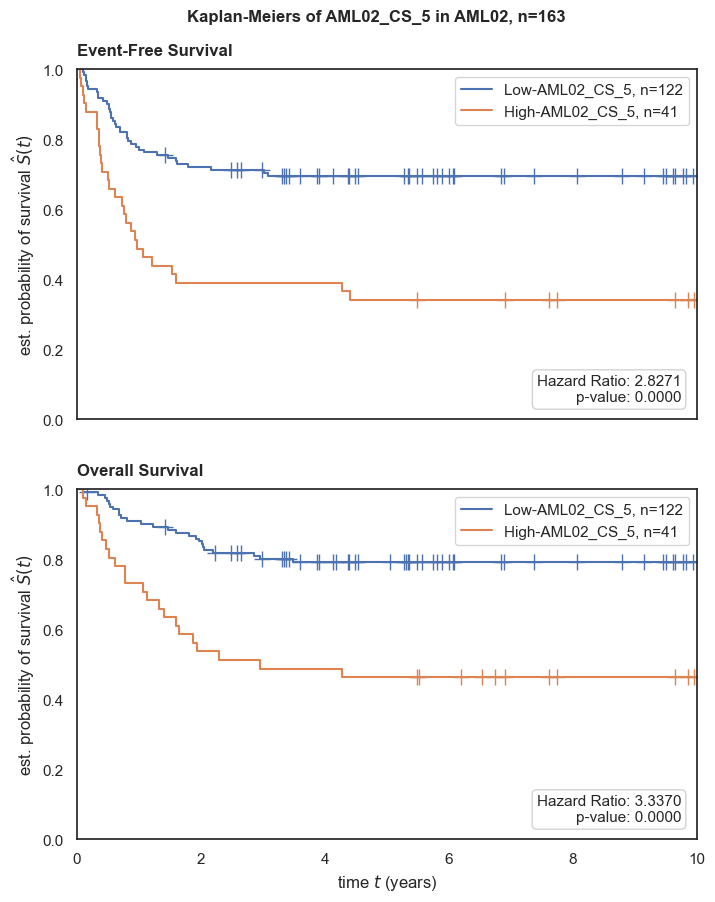

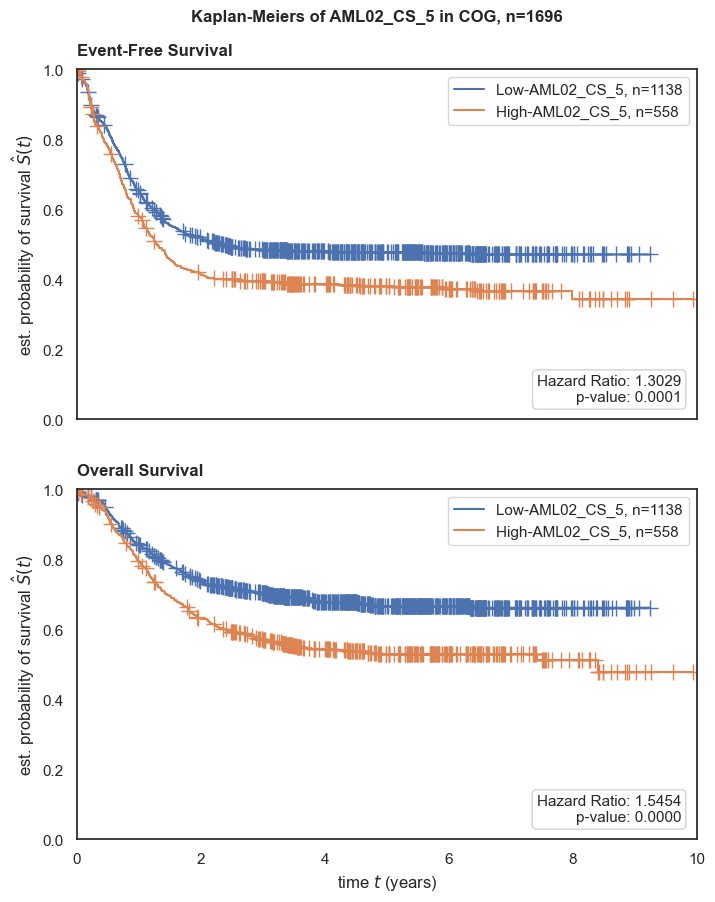

In [6]:
draw_kaplan_meier(scorename=score_name,
                        df=df_aml02,
                        save_plot=True,
                        add_risk_counts=False,
                        trialname='AML02')

draw_kaplan_meier(scorename=score_name,
                        df=df_cog,
                        save_plot=True,
                        add_risk_counts=False,
                        trialname='COG')

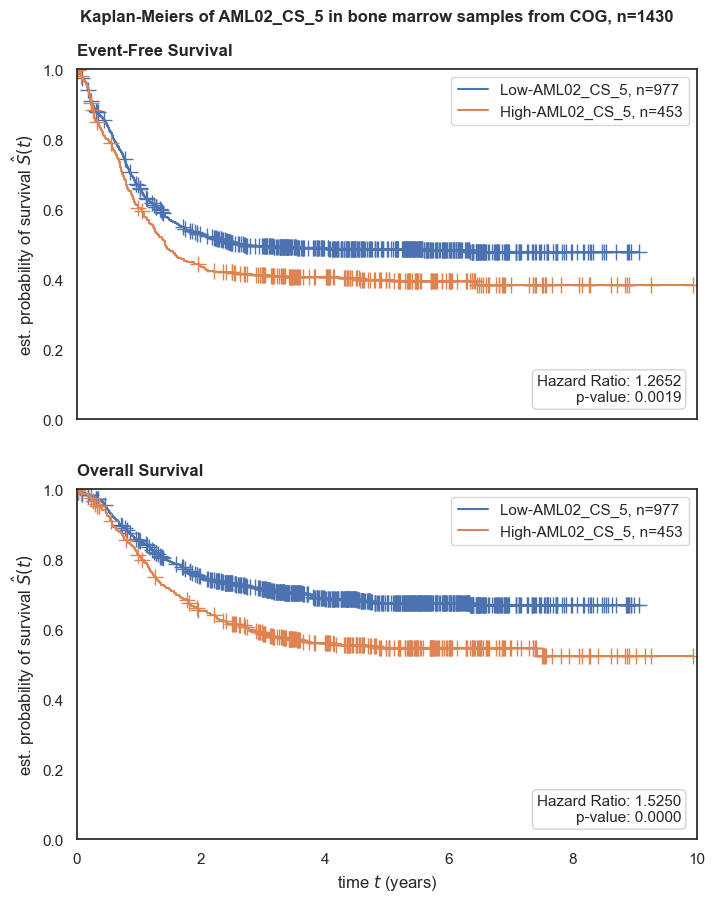

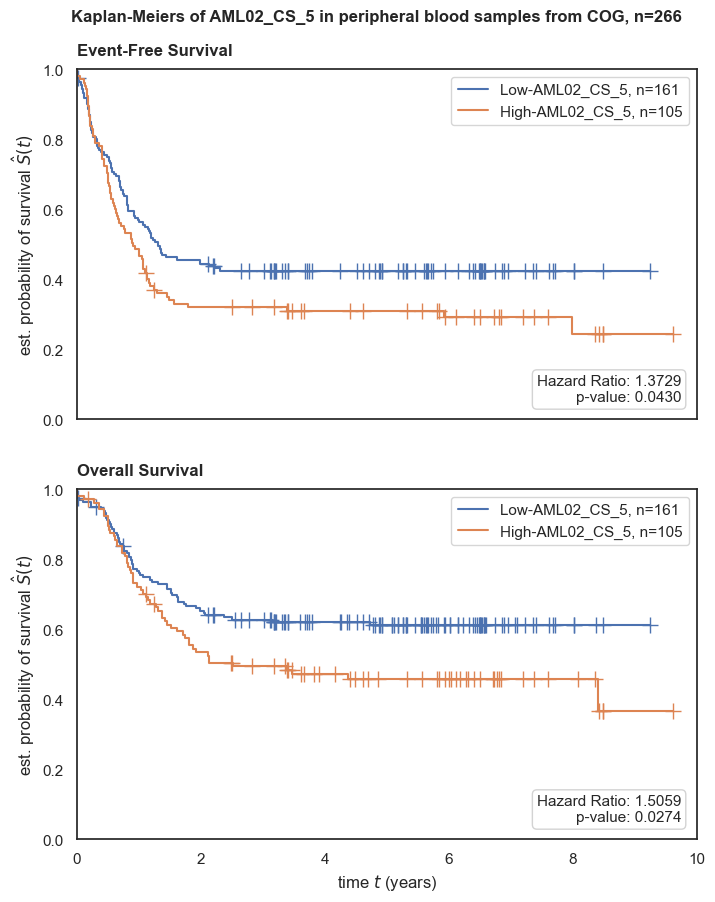

In [7]:
draw_kaplan_meier(scorename=score_name,
                        df=cog_bm,
                        save_plot=True,
                        add_risk_counts=False,
                        trialname='bone marrow samples from COG')
draw_kaplan_meier(scorename=score_name,
                        df=cog_pb,
                        save_plot=True,
                        add_risk_counts=False,
                        trialname='peripheral blood samples from COG')

## Forest Plots

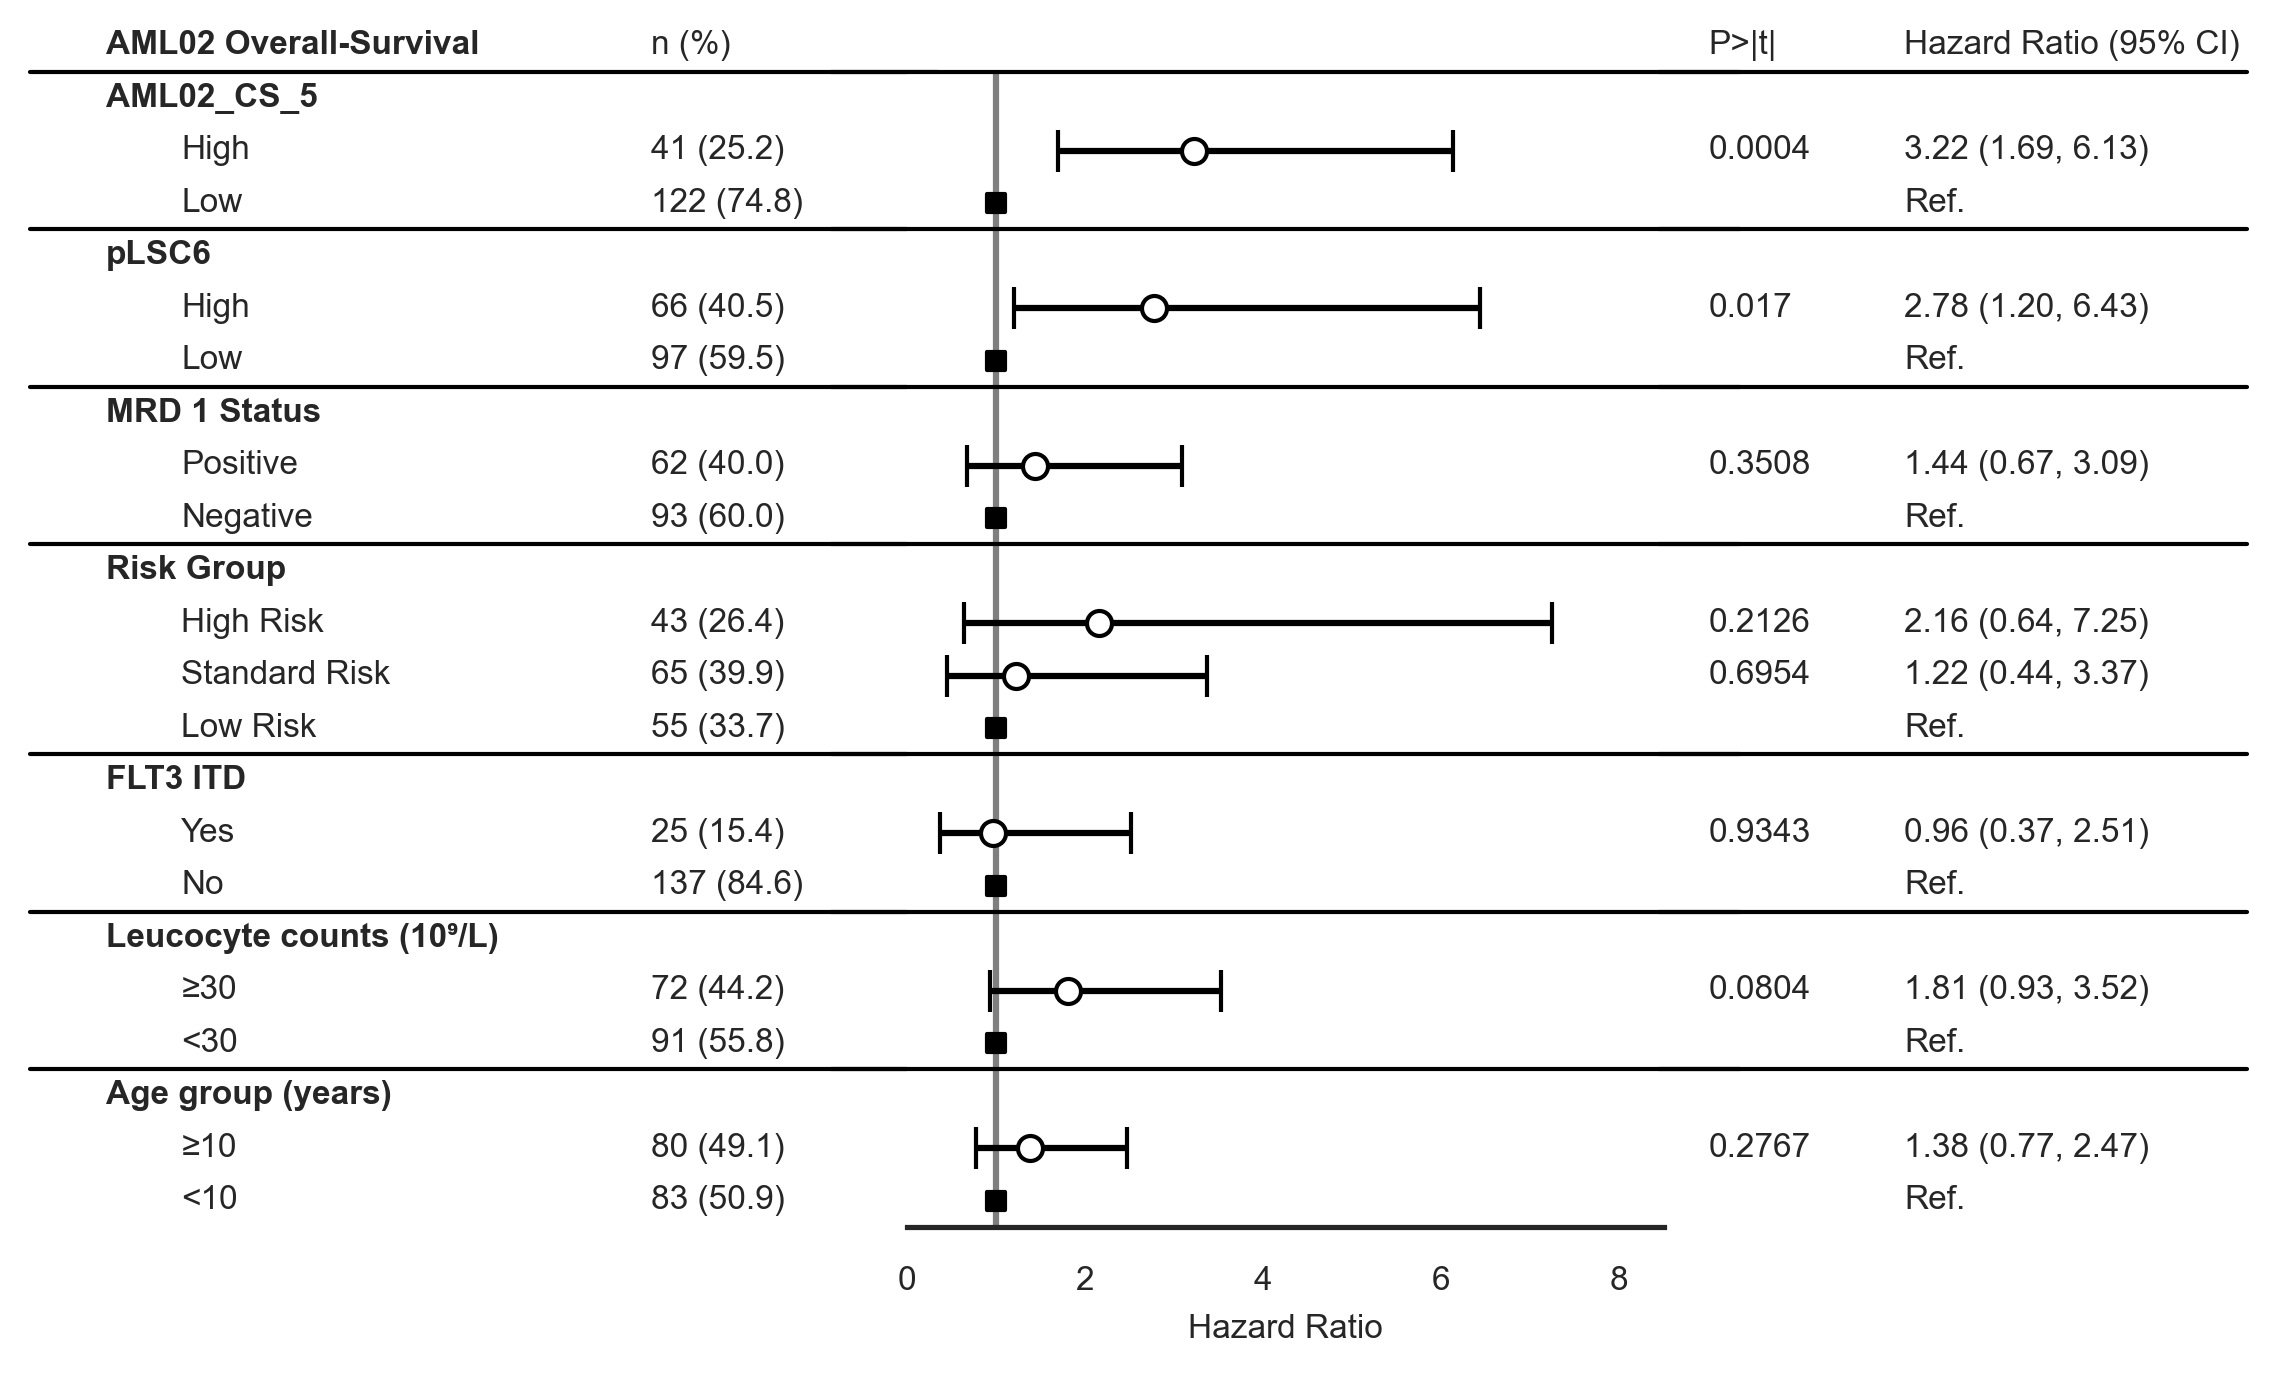

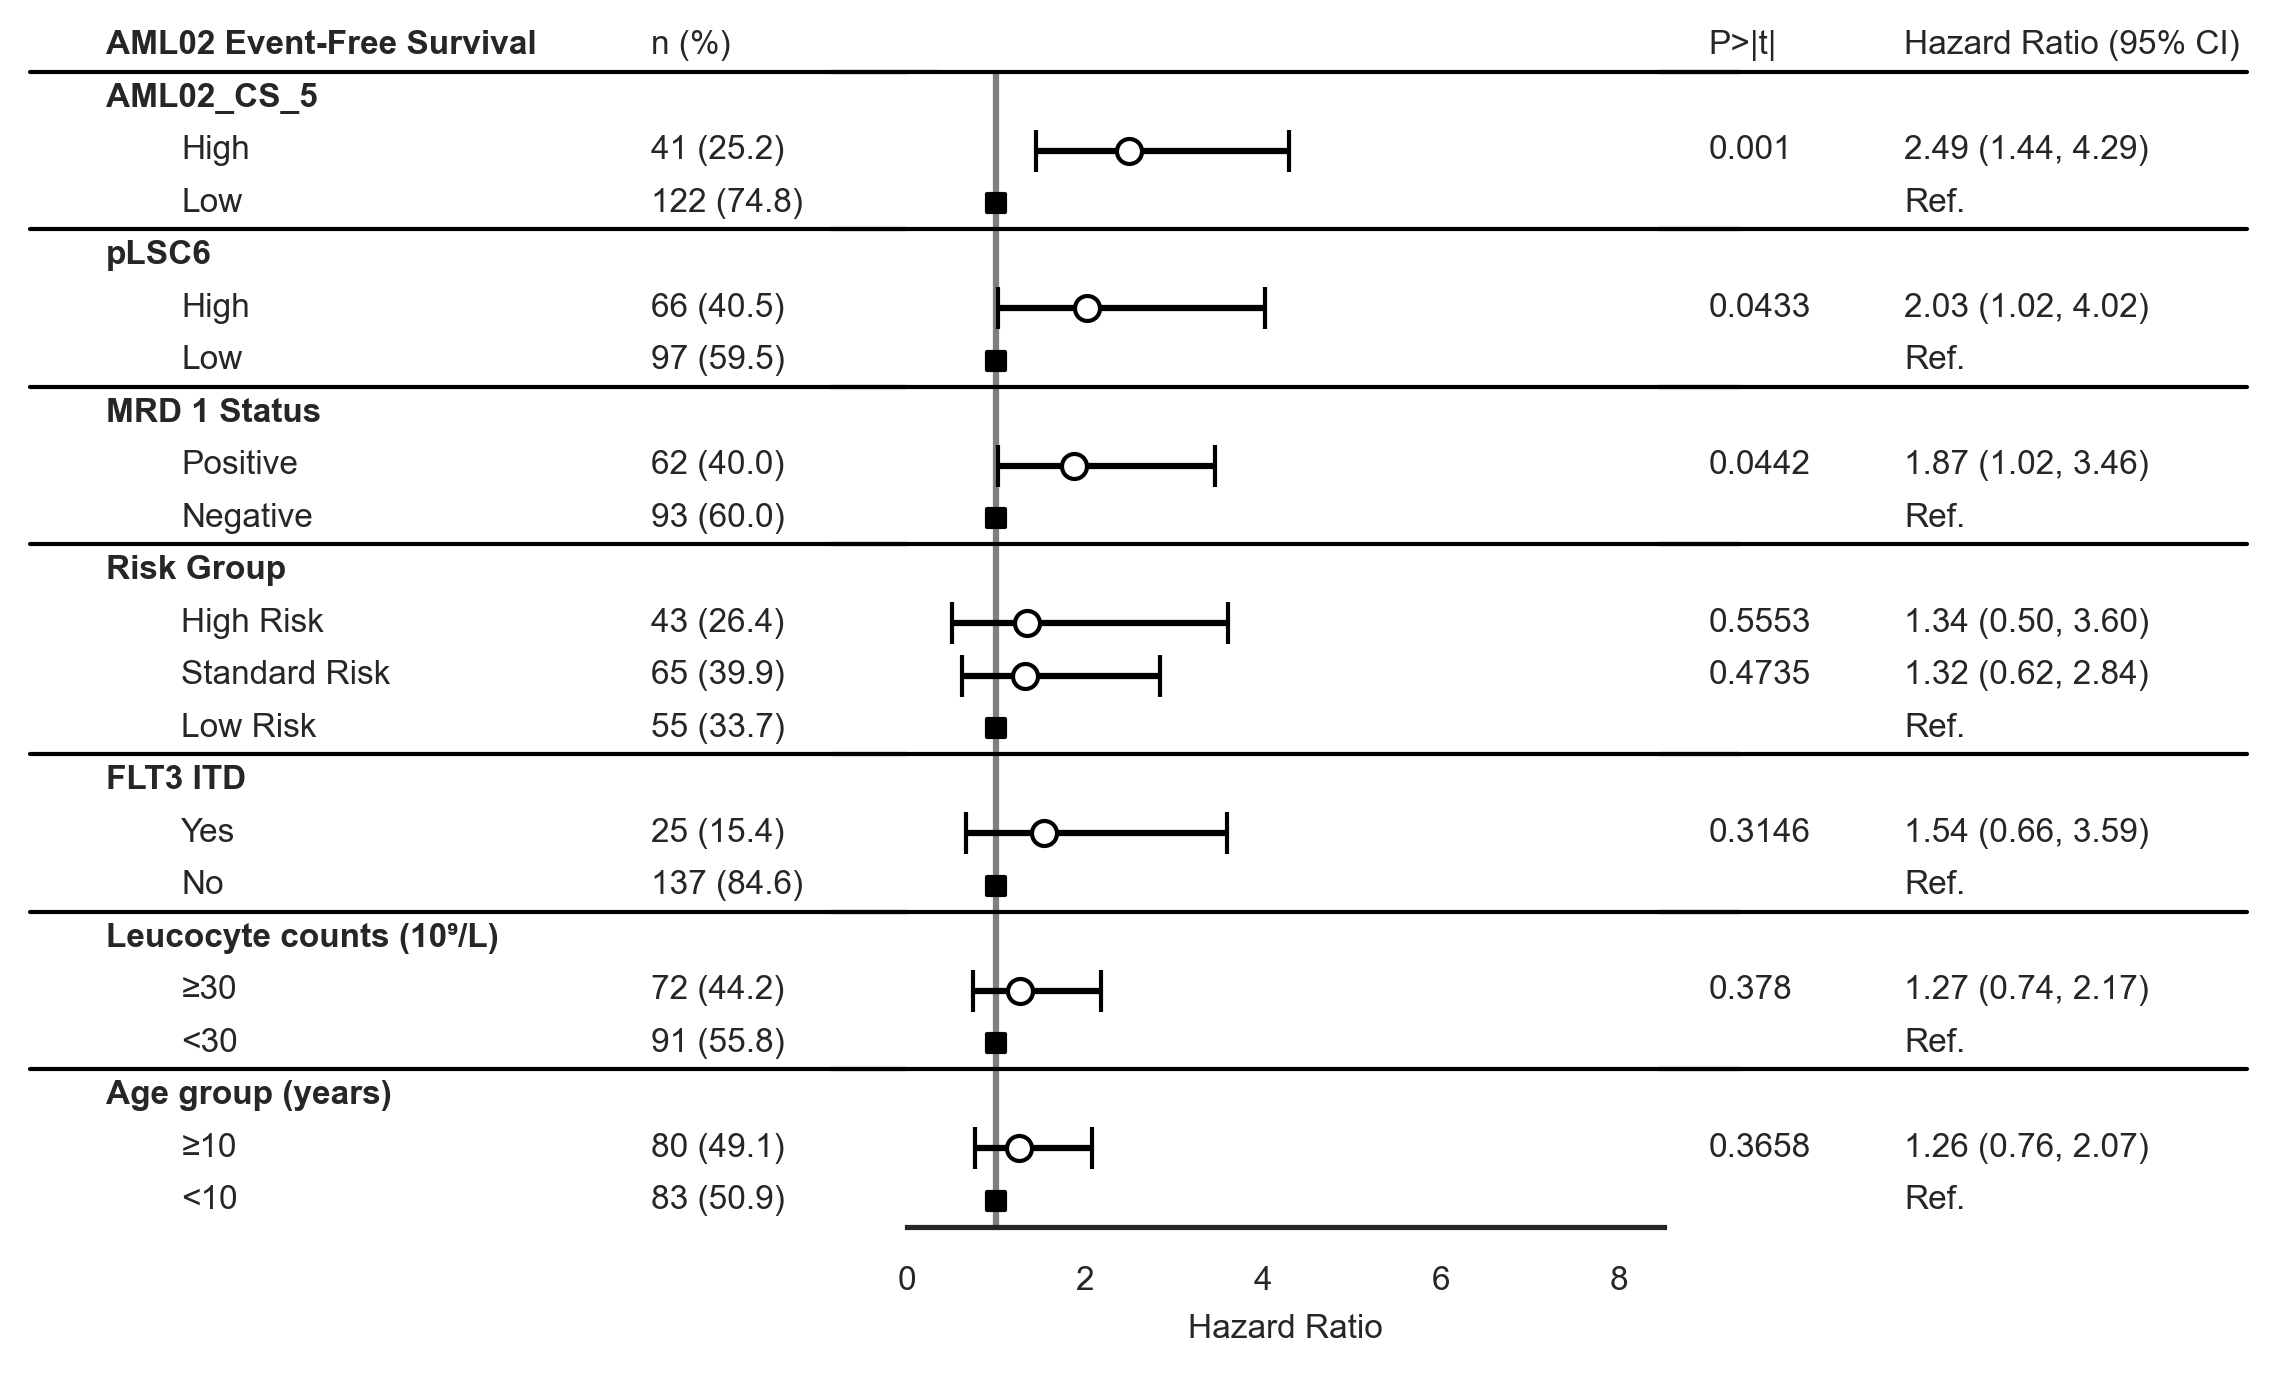

In [8]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=df_aml02,
                    trialname='AML02',
                    scorename=score_name,
                    save_plot=True)
draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=df_aml02,
                    trialname='AML02',
                    scorename=score_name,
                    save_plot=True)



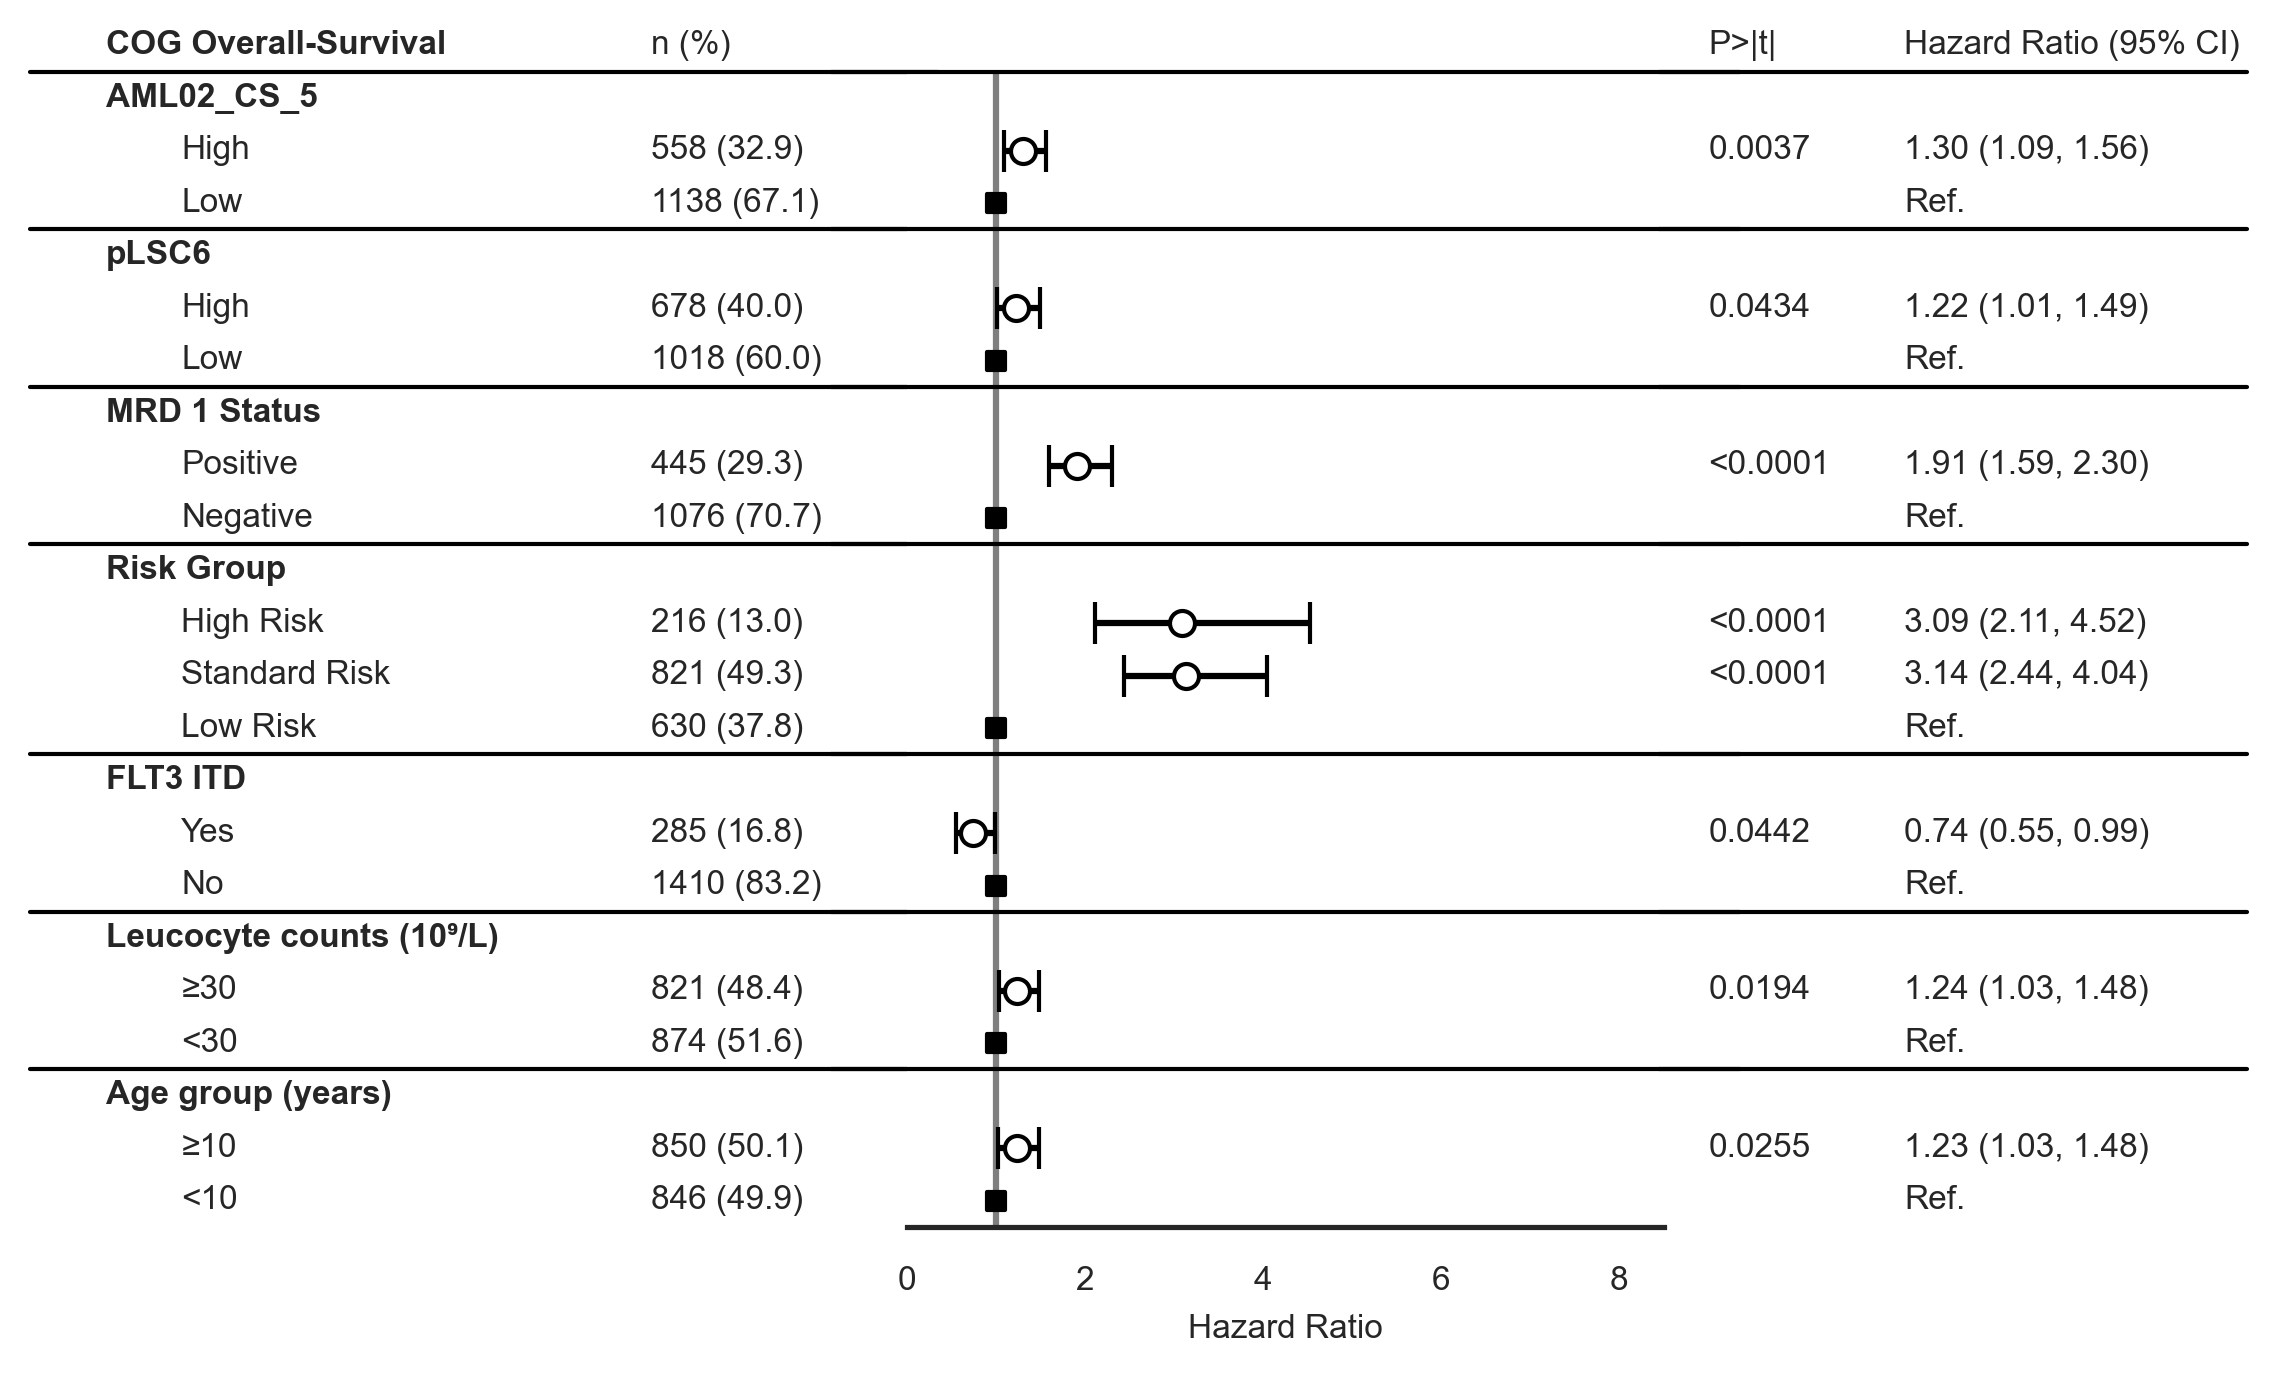

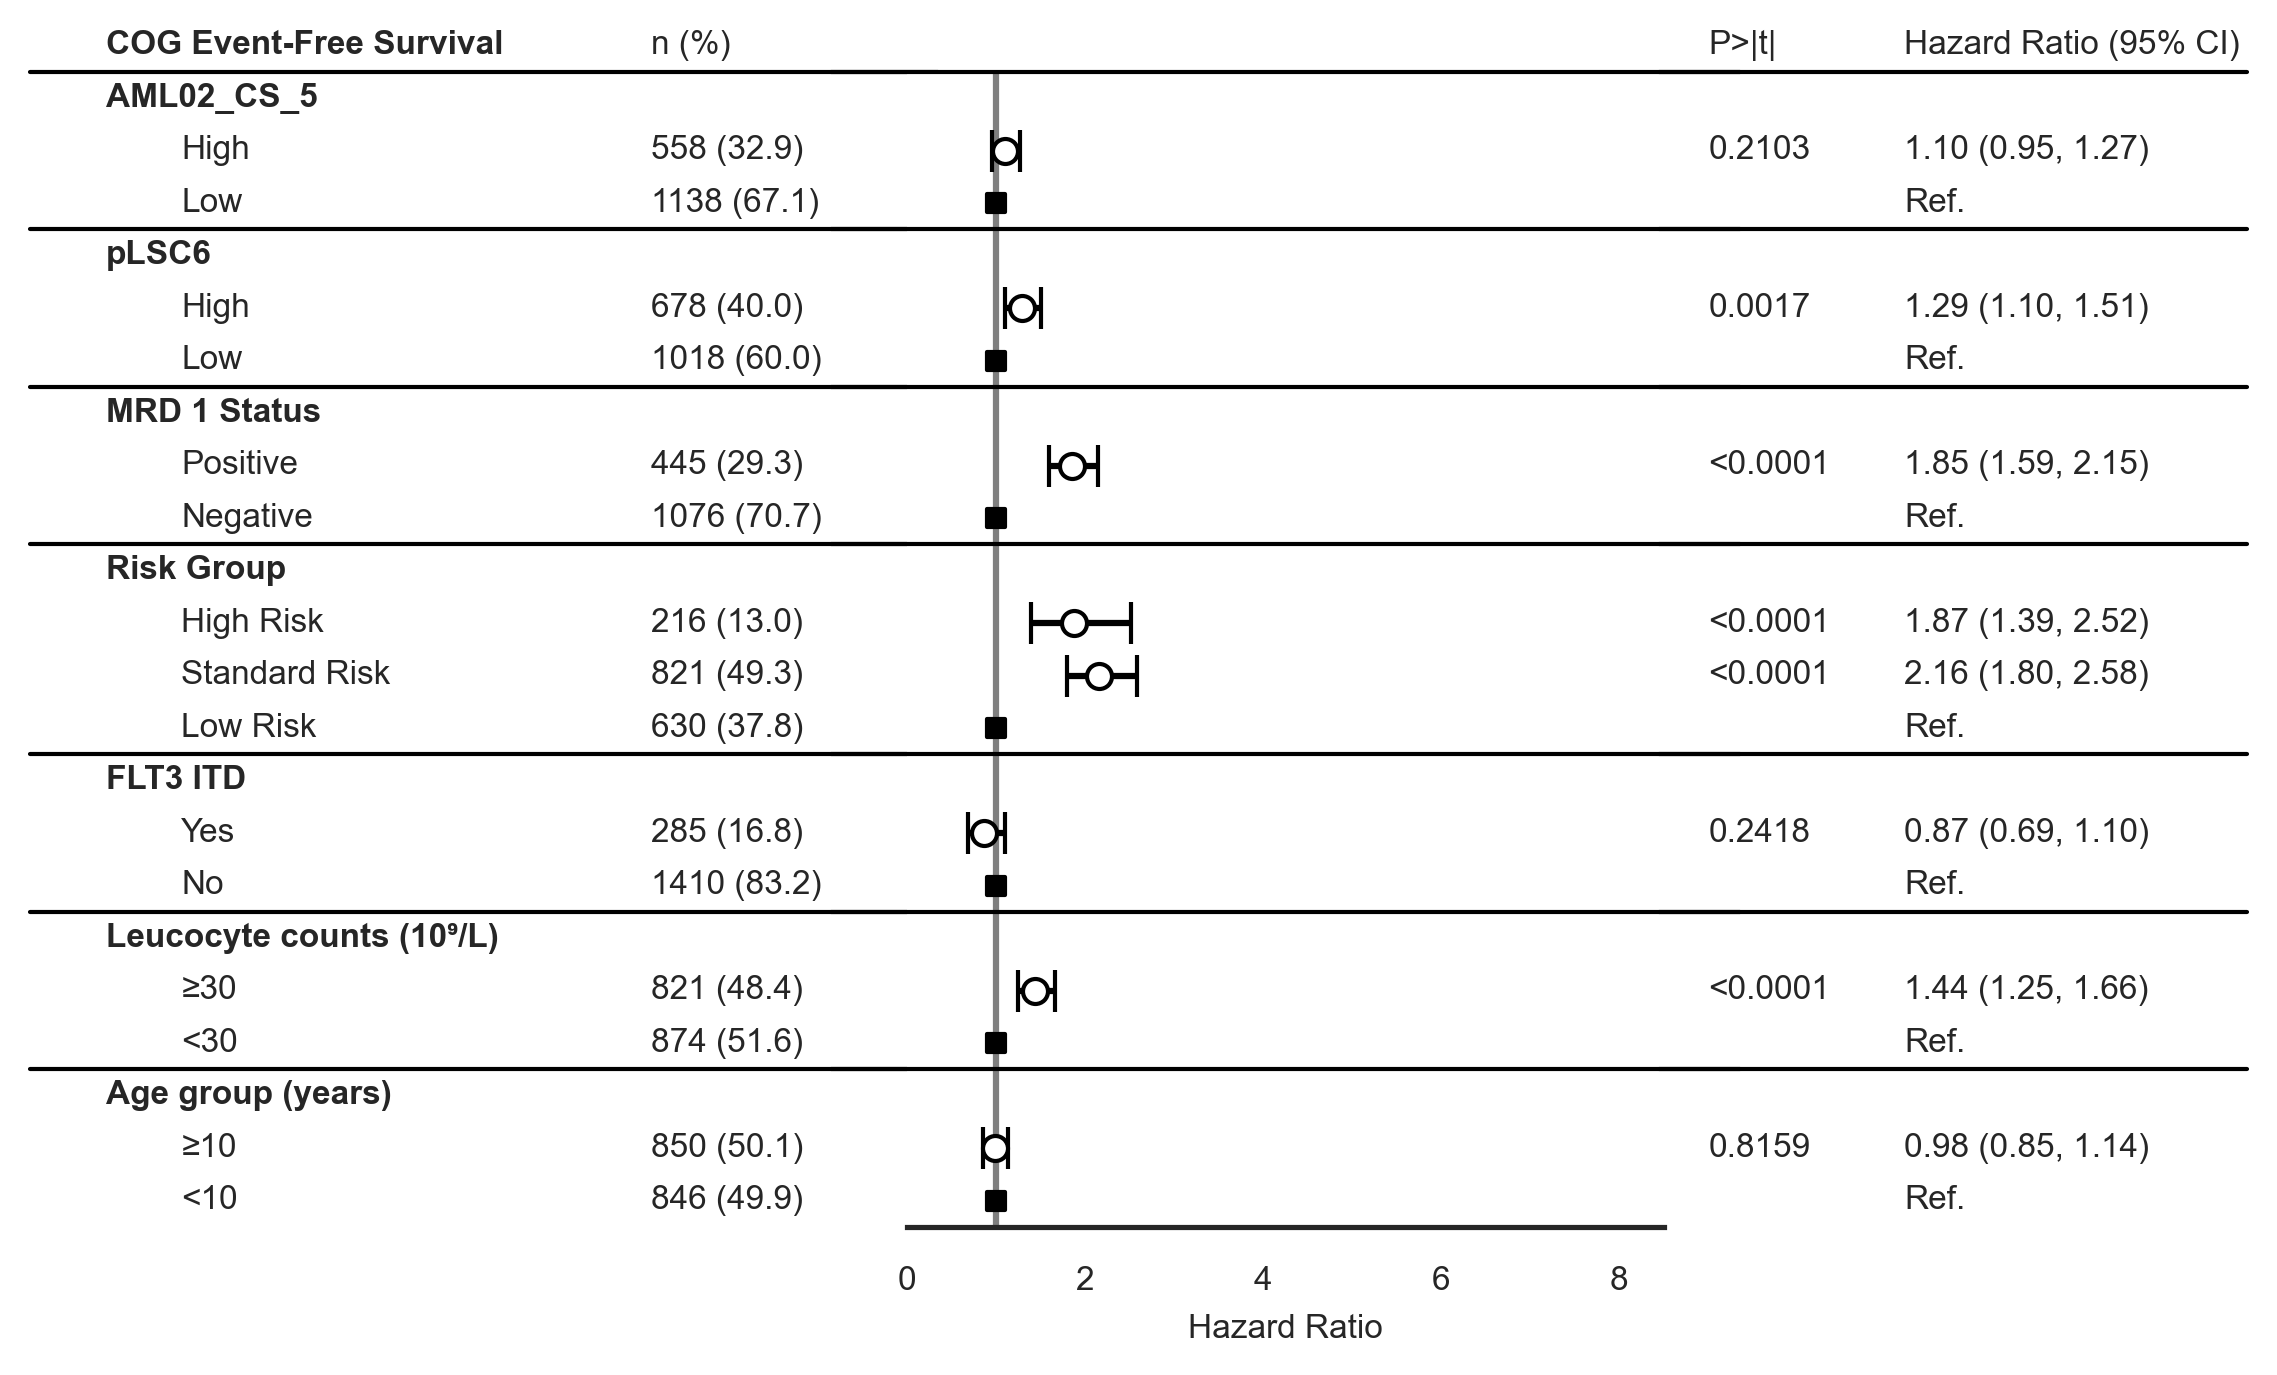

In [9]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=df_cog,
                    trialname='COG',
                    scorename=score_name,
                    save_plot=True)
draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=df_cog,
                    trialname='COG',
                    scorename=score_name,
                    save_plot=True)

## Patient Characteristics Table

In [10]:
from tableone import TableOne

In [11]:
df_all = pd.concat([df_aml02,df_cog], join='outer',keys=['StJude (Discovery)','COG (Validation)']).reset_index(level=0, names='cohort')

In [12]:
columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latinx ethnic group', 'MRD 1 Status',
            'Vital Status', 'Leucocyte counts (10⁹/L)',
            'Risk Group','FLT3 ITD', 'Tissue Type']

In [13]:
mytable_all = TableOne(df_all, columns,overall=False,missing=False,pval=False,
                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby='cohort')
mytable_all.tabulate(tablefmt="html", headers=[score_name,"",'COG (Validation)','StJude (Discovery)'])

AML02_CS_5,,COG (Validation),StJude (Discovery)
n,,1696,163
"Age (years), mean (SD)",,9.7 (6.4),8.8 (6.1)
"Age group (years), n (%)",≥10,850 (50.1),80 (49.1)
,<10,846 (49.9),83 (50.9)
"Sex, n (%)",Female,815 (48.1),74 (45.4)
,Male,881 (51.9),89 (54.6)
"Race or ethnic group, n (%)",White,1237 (80.7),115 (71.0)
,Black or African American,195 (12.7),31 (19.1)
,Asian,74 (4.8),
,American Indian or Alaska Native,10 (0.7),


In [14]:
columns2 = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latinx ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD','Tissue Type']

In [15]:
mytable_cog = TableOne(df_cog, columns2,
                        overall=False, missing=True,
                        pval=True, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby=score_name + ' Categorical')
mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','High','Low','p-value','Statistical Test'])

AML02_CS_5,,Missing,High,Low,p-value,Statistical Test
n,,,558,1138,,
"Age (years), mean (SD)",,0,8.9 (6.6),10.1 (6.3),0.001,Two Sample T-test
"Age group (years), n (%)",≥10,0,260 (46.6),590 (51.8),0.048,Chi-squared
,<10,,298 (53.4),548 (48.2),,
"Sex, n (%)",Female,0,278 (49.8),537 (47.2),0.333,Chi-squared
,Male,,280 (50.2),601 (52.8),,
"Race or ethnic group, n (%)",White,163,410 (80.2),827 (80.9),0.070,Chi-squared (warning: expected count < 5)
,Black or African American,,71 (13.9),124 (12.1),,
,Asian,,27 (5.3),47 (4.6),,
,Other,,3 (0.6),6 (0.6),,


In [16]:
columns3 = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latinx ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group','FLT3 ITD',
            'Treatment Arm']

In [17]:
mytable_aml02 = TableOne(df_aml02, columns3,
                        overall=False, missing=True,
                        pval=True, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby= score_name + ' Categorical')
mytable_aml02.tabulate(tablefmt="html",
                        headers=[score_name,"",'Missing','High','Low','p-value','Statistical Test'])

AML02_CS_5,,Missing,High,Low,p-value,Statistical Test
n,,,41,122,,
"Age (years), mean (SD)",,0,9.6 (6.3),8.5 (6.0),0.338,Two Sample T-test
"Age group (years), n (%)",≥10,0,22 (53.7),58 (47.5),0.619,Chi-squared
,<10,,19 (46.3),64 (52.5),,
"Sex, n (%)",Female,0,16 (39.0),58 (47.5),0.443,Chi-squared
,Male,,25 (61.0),64 (52.5),,
"Race or ethnic group, n (%)",White,1,30 (73.2),85 (70.2),0.142,Chi-squared (warning: expected count < 5)
,Black or African American,,10 (24.4),21 (17.4),,
,Other,,1 (2.4),15 (12.4),,
"Hispanic or Latinx ethnic group, n (%)",Hispanic or Latinx,1,7 (17.5),12 (9.8),0.255,Fisher's exact


## Bar Plots

In [18]:
import numpy as np

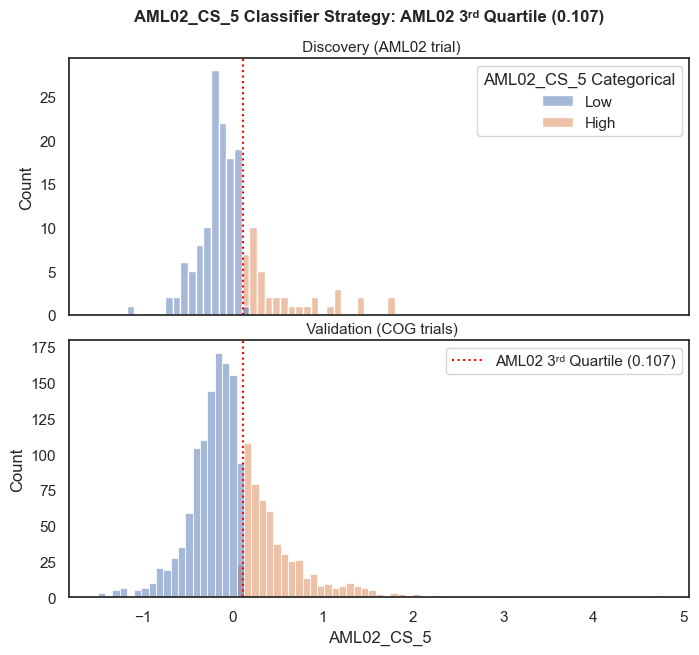

In [19]:
# Set up the matplotlib figure
sns.set_theme(style='white')
f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,7))

# Define plots
sns.histplot(data=df_aml02,x=score_name, hue=score_name + ' Categorical', ax=axs[0], bins=35)
sns.histplot(data=df_cog,x=score_name, hue=score_name + ' Categorical', ax=axs[1])

# Set specs
cutoff = np.quantile(df_aml02[score_name],0.75)

for i in range(2):
    axs[i].axvline(cutoff, linestyle="dotted",color='red', label='AML02 3ʳᵈ Quartile ('+ round(cutoff,3).astype(str)+ ')')

axs[0].set_title(' Discovery (AML02 trial)', loc='center', pad=5, fontsize=11)
axs[1].set_title(' Validation (COG trials)', loc='center', pad=5, fontsize=11)

axs[1].legend()
    # Define Plot Specs
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.suptitle(score_name + ' Classifier Strategy: AML02 3ʳᵈ Quartile ('+ round(cutoff,3).astype(str)+ ')',
                 fontsize='medium', y=0.95,
                 fontweight='bold')
plt.savefig('../Figures/Bar_Plots/'+score_name+'_Classifier_Strategy.png',
                    bbox_inches='tight', dpi=300)

plt.show()

## Heatmaps

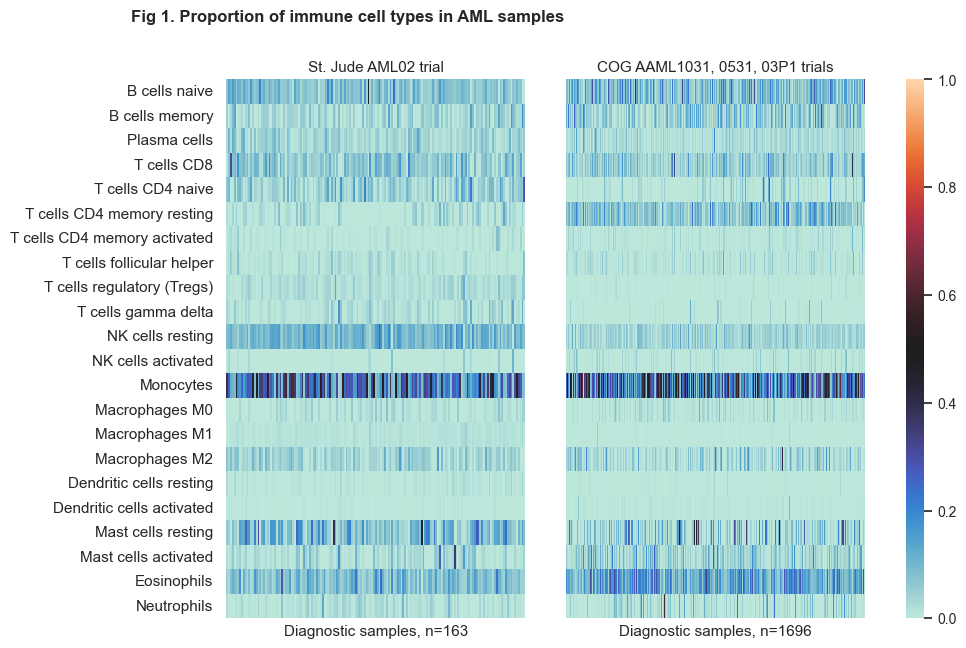

In [20]:
draw_heatmaps(fig_title = 'Proportion of immune cell types in AML samples',
            t1='St. Jude AML02 trial', t2= 'COG AAML1031, 0531, 03P1 trials',
            df1 = df_aml02.iloc[:,:22].T, df2 = df_cog.iloc[:,:22].T,
            save_plot=True, fig_number=1)

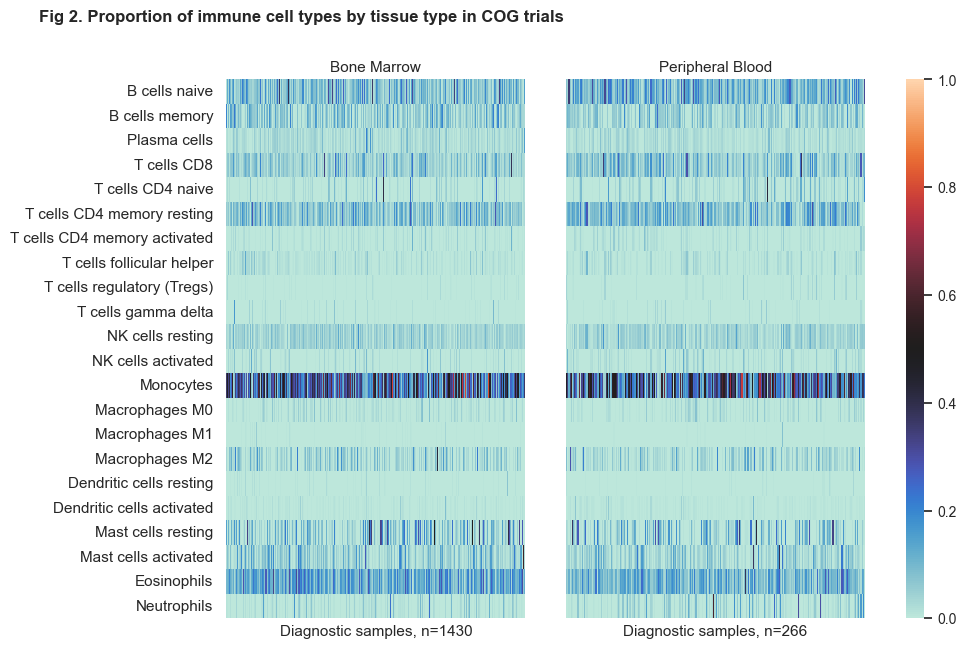

In [21]:
draw_heatmaps(fig_title = 'Proportion of immune cell types by tissue type in COG trials',
            t1='Bone Marrow', t2= 'Peripheral Blood',
            df1 = cog_bm.iloc[:,:22].T, df2 = cog_pb.iloc[:,:22].T,
            save_plot=True, fig_number=2)

## Box Plots

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

High Risk vs. Standard Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.000e+00 Stat=2.216e-03
Standard Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:3.228e-01 Stat=2.589e+00
High Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:2.021e-01 Stat=3.346e+00


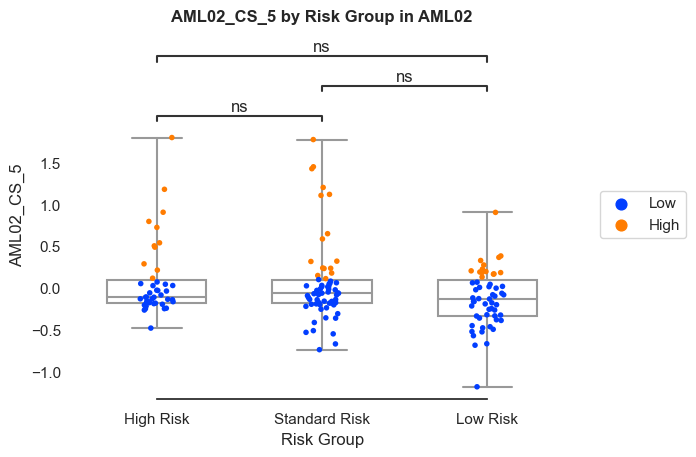

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

High Risk vs. Standard Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:6.868e-03 Stat=9.302e+00
Standard Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:6.841e-31 Stat=1.357e+02
High Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:4.143e-06 Stat=2.331e+01


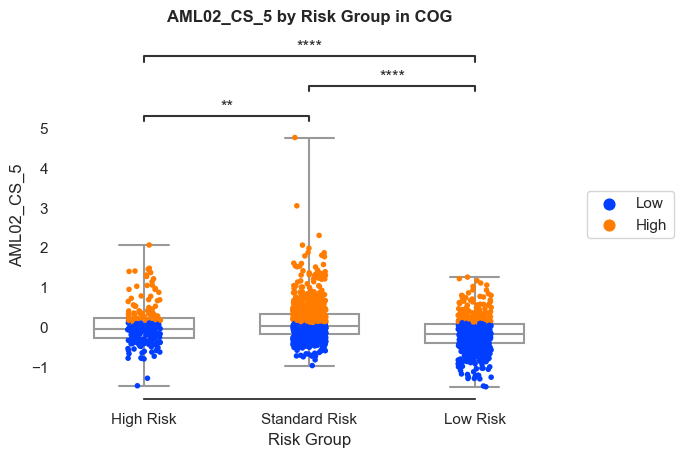

In [22]:
draw_boxplot(df=df_aml02,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='AML02', hue=score_name +' Categorical',
                save_plot=True, figsize=None)

draw_boxplot(df=df_cog,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='COG', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Positive vs. Negative: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.300e-02 Stat=6.169e+00


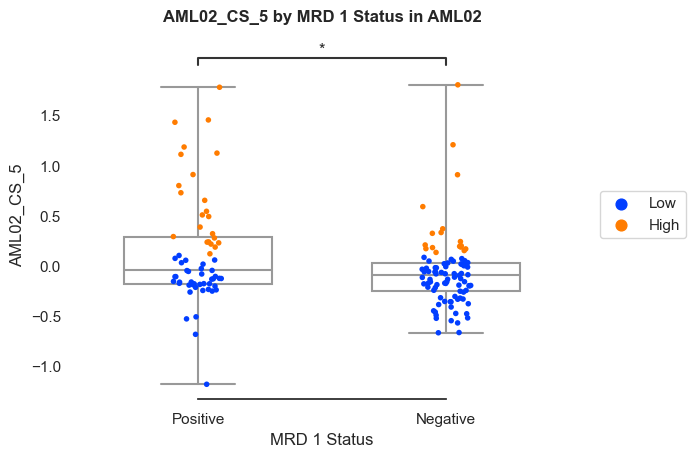

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Positive vs. Negative: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:3.498e-06 Stat=2.152e+01


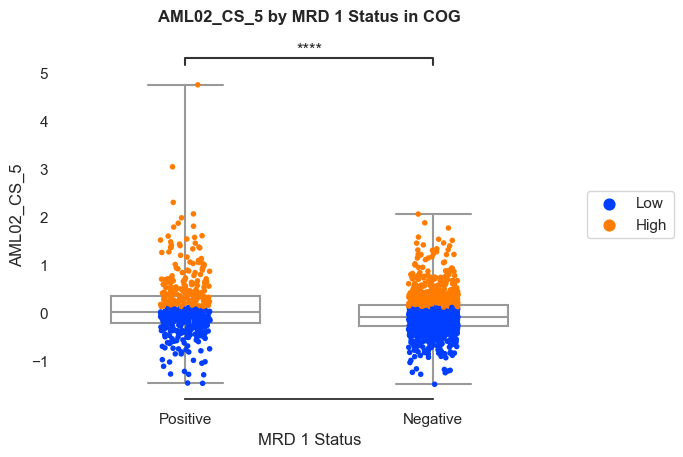

In [23]:
draw_boxplot(df=df_aml02,x='MRD 1 Status', y=score_name,
                order=['Positive','Negative'],
                trialname='AML02', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

draw_boxplot(df=df_cog,x='MRD 1 Status', y=score_name,
                order=['Positive','Negative'],
                trialname='COG', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

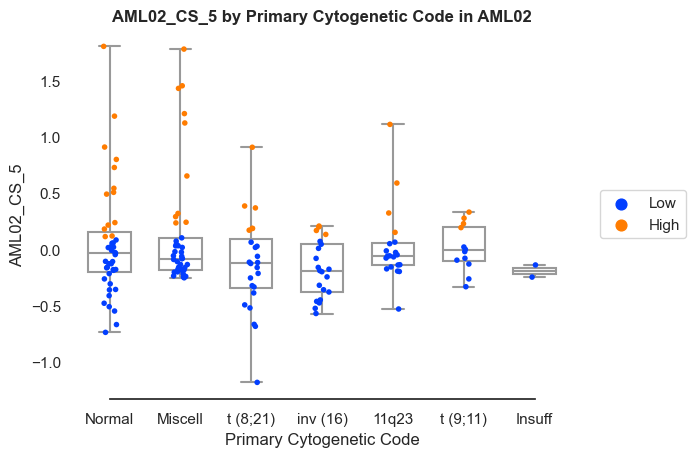

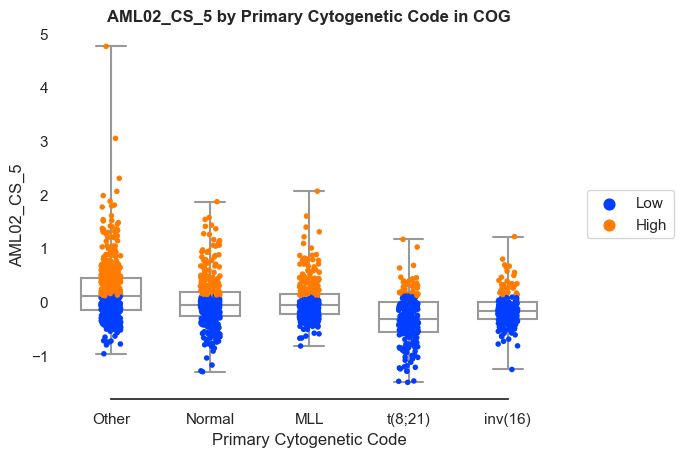

In [24]:
draw_boxplot(df=df_aml02,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='AML02', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

draw_boxplot(df=df_cog,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='COG', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

## Scatterplots

In [25]:
mean_coefs = ['NK cells activated', 'Dendritic cells activated',
                'T cells CD4 memory resting','Mast cells activated',
                'Mast cells resting']

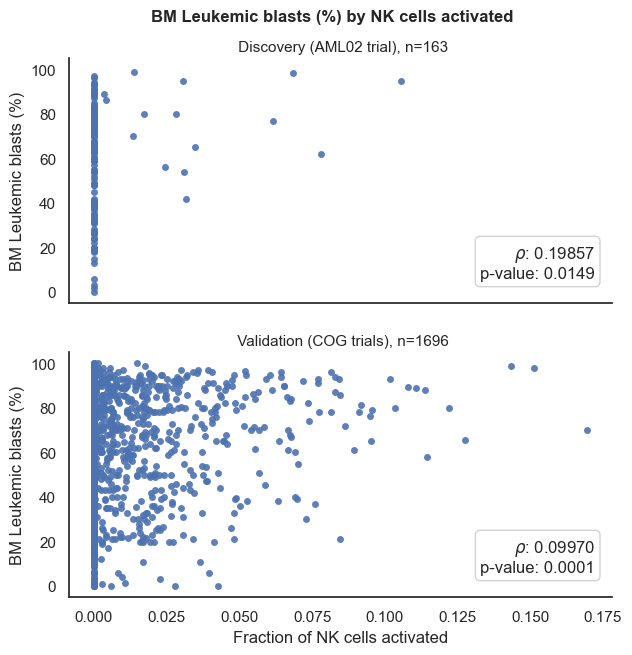

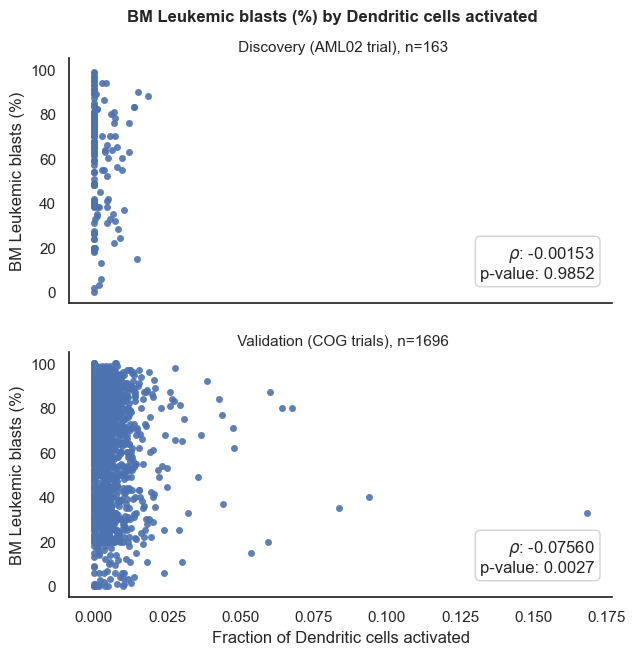

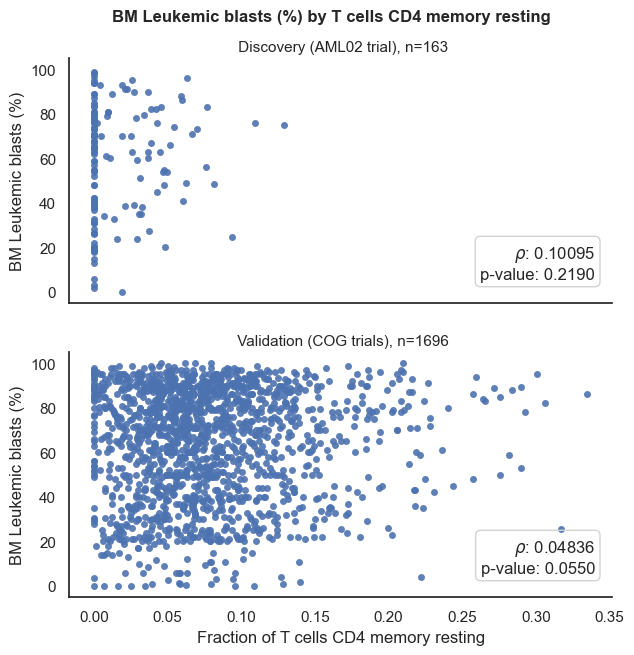

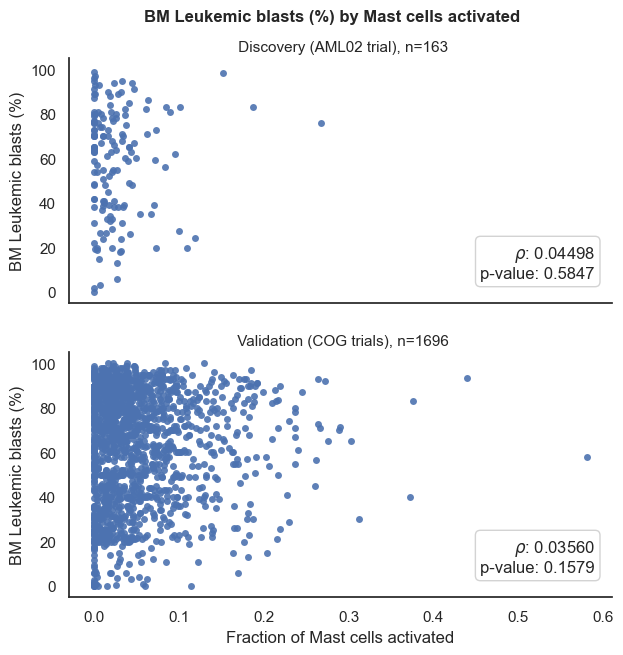

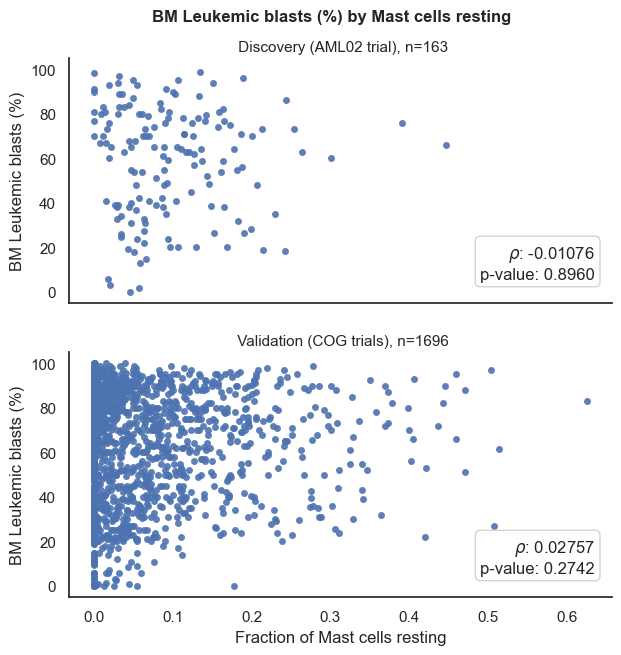

In [26]:
for i in range(len(mean_coefs)):
    draw_scatterplot(df_train=df_aml02,df_test=df_cog,
                x=mean_coefs[i],y='BM Leukemic blasts (%)',
                hue=None, s=25, save_plot=True)

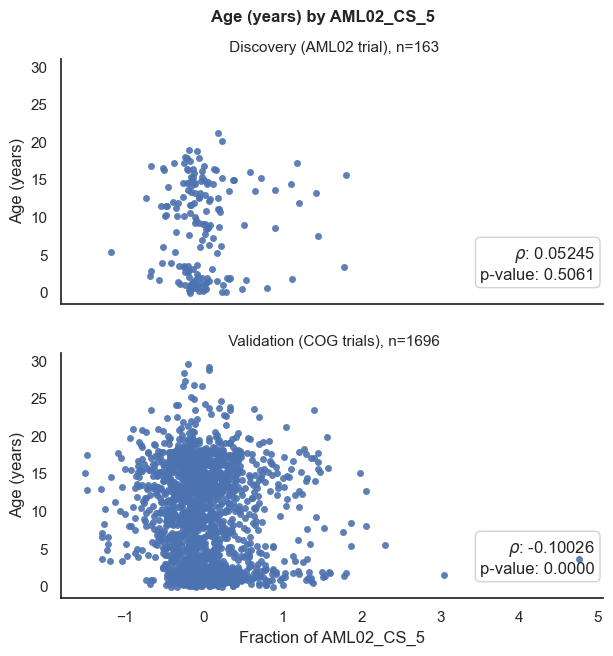

In [27]:
draw_scatterplot(df_train=df_aml02,df_test=df_cog,
                x=score_name,y='Age (years)',
                hue=None, s=25, save_plot=False)

## Correlation Plots

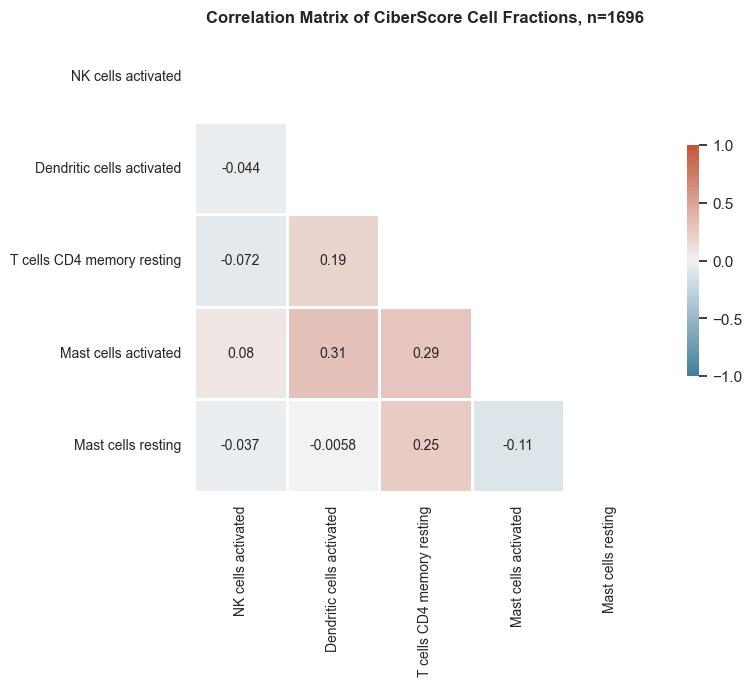

In [28]:
# Compute the correlation matrix
corr = df_aml02[mean_coefs].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,annot=True,
            square=True, linewidths=1,cbar_kws={"shrink": .5}, annot_kws={"fontsize":10})

# Set plot specs
plt.title('Correlation Matrix of CiberScore Cell Fractions, n=1696',
            fontsize='medium', y=1,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)

# Save
plt.savefig('../Figures/Correlation_Plots/ciberscore_cell_fractions.png',
                   bbox_inches='tight', dpi=300)

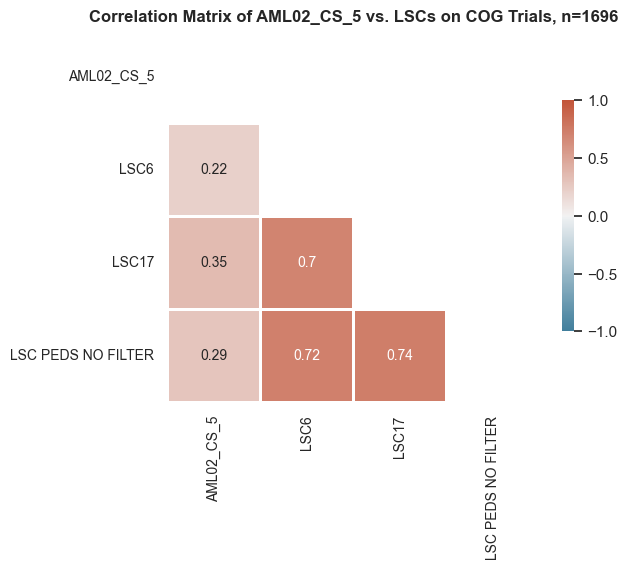

In [29]:
# Compute the correlation matrix
corr = df_cog[[score_name,'LSC6','LSC17','LSC PEDS NO FILTER']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,annot=True,
            square=True, linewidths=1,cbar_kws={"shrink": .5}, annot_kws={"fontsize":10})

# Set plot specs
plt.title('Correlation Matrix of '+score_name+' vs. LSCs on COG Trials, n=1696',
            fontsize='medium', y=1,fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=10)
#plt.tight_layout()

# Save
plt.savefig('../Figures/Correlation_Plots/'+score_name+'_LSCs.png',
                  bbox_inches='tight', dpi=300)

## End